# Dealing with Missing Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\Data Science 2024\Study\ames_outliers_removed.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
# We can see the there is Unnamed coulumn added showing row number and PID is also there.
# We can actually drop those columns from our datasets, because these are not the features
df = df.drop('PID',axis=1) # axis = 1 refers to Columns
len(df.columns)

81

In [5]:
df = df.drop(df.columns[0],axis=1) # axis = 1 refers to Columns
len(df.columns)

80

In [6]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


df.isnull().sum()    # showing the count of null records for each column or feature

In [8]:
# Let's find the missing values in terms of % percentage of the total records for that feature.
(df.isnull().sum()/len(df))*100

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

### Write a python function to get the missing values count in terms of percentage

In [10]:
def percent_missing(df):
    percent_null = (df.isnull().sum()/len(df))*100
    # remove the records where missing data is 0 or 0%
    percent_null = percent_null[percent_null > 0]
    return percent_null

def plt_bargraph():
    percent_nan = percent_missing(df).sort_values()
    plt.figure(figsize=(8,4),dpi=200)
    sns.barplot(x=percent_nan.index,y=percent_nan)
    plt.xticks(rotation=90)
    # plt.ylim(0,1.2)
    plt.show()

In [11]:
# Calculate the percentage of data missing per feature column
percent_nan = percent_missing(df).sort_values()
percent_nan

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

### Plot this on the graph using bar plot

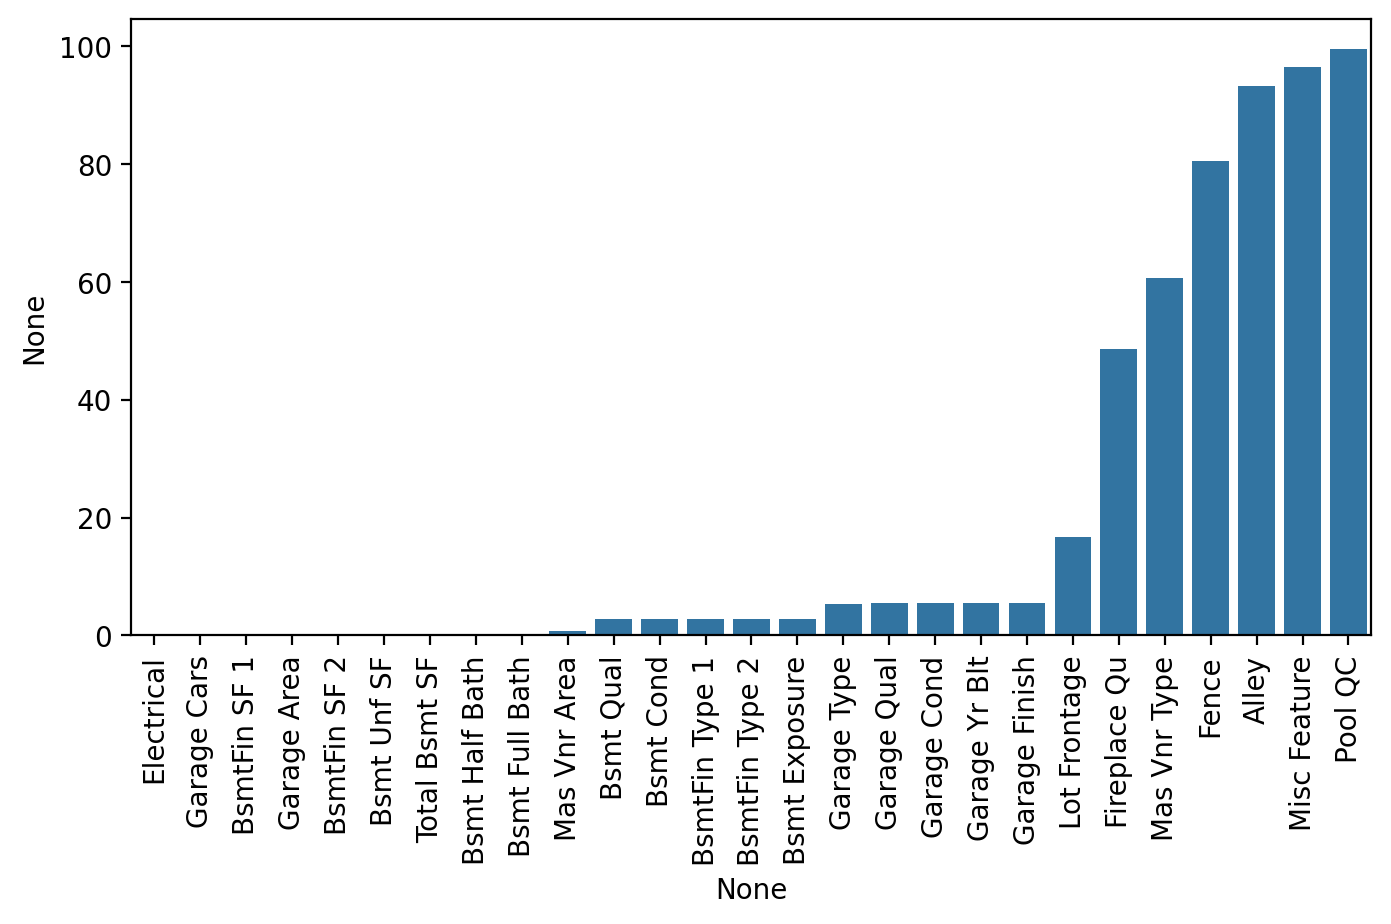

In [13]:
# plt.figure(figsize=(8,4),dpi=200)
# sns.barplot(x=percent_nan.index,y=percent_nan)
# #As feature/columns names are overlapped as they are horizontally placed on X-axis
# # Rotate those xticks
# plt.xticks(rotation=90)
# plt.show()
plt_bargraph()


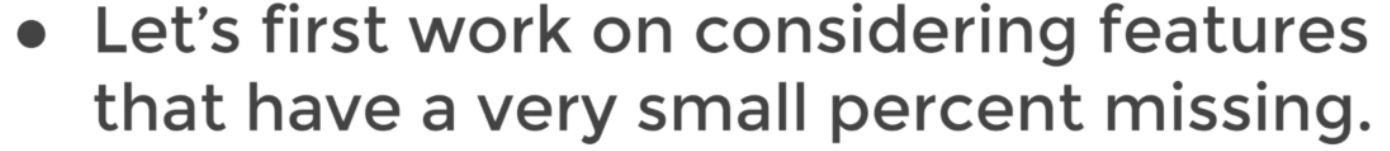
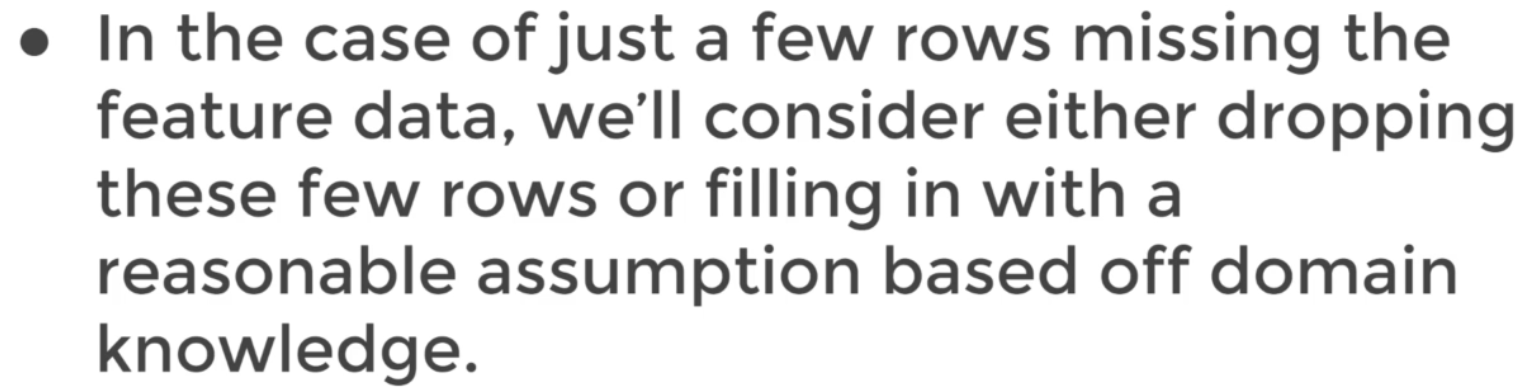

# Part I - Filling data for rows
 ### Let's consider the feature with upto 1% missing data
 #### Plot the graph

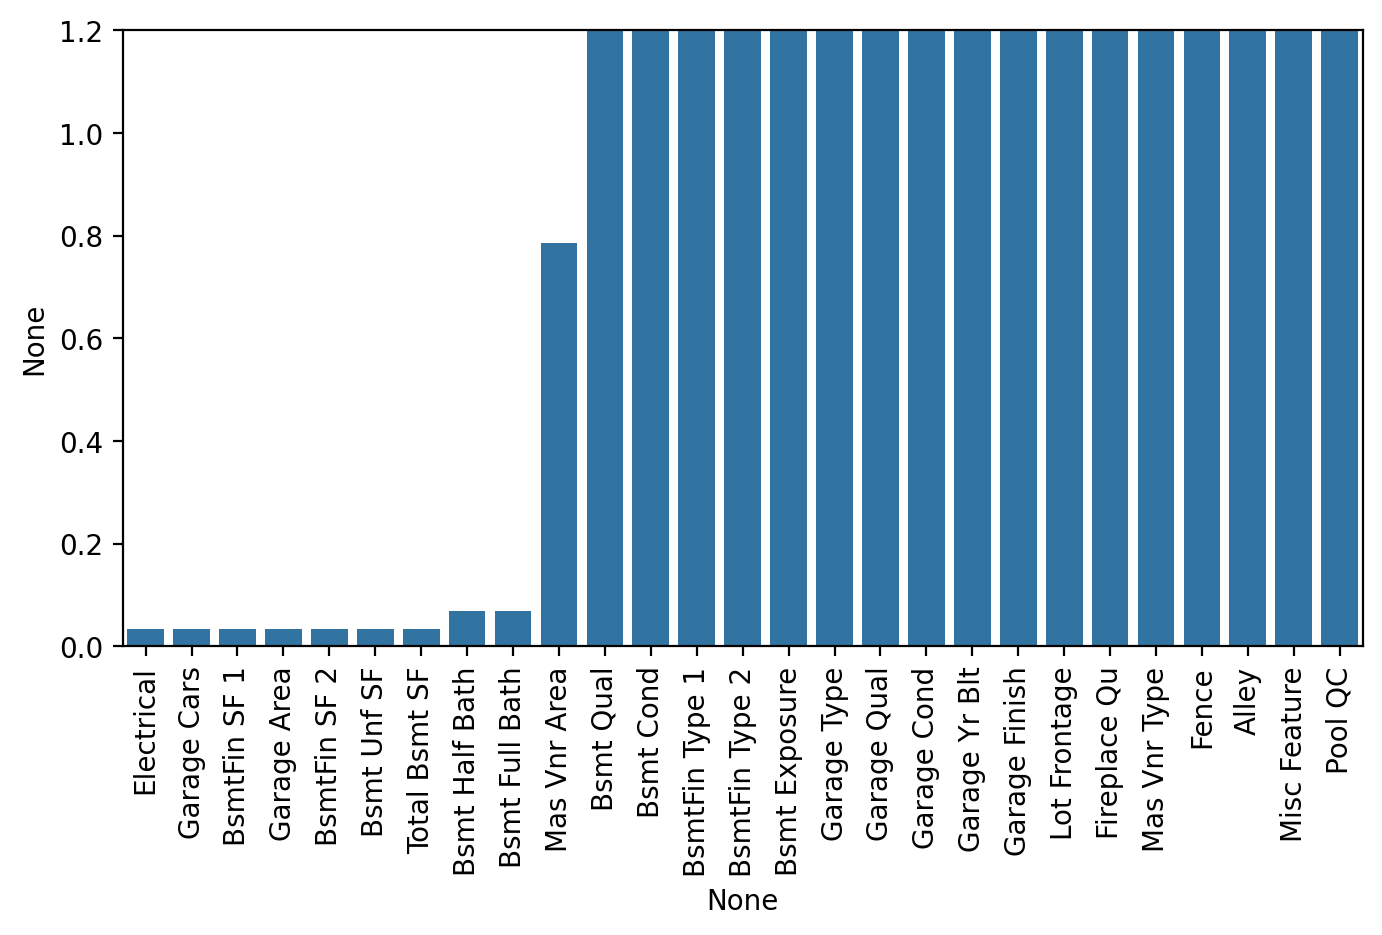

In [16]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1.2) # will plot graph y percentage upto 1.25% so that, we can clearly see the feature below 1 %
plt.show()

### We can see the feature Electrical, Garage Cars,..., Mas Vnr Area are under 1% of missing data
#### Let's consider that we can compromise with this data where 1% is missing,
#### So we will drop the 1% rows, where this data is missing

In [18]:
# Get the data where percent_nan < 1
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [19]:
# Convert the % missing into the number of rows of missing data in dataset
(percent_nan[percent_nan < 1] )/100*len(df) 

Electrical         1.0
Garage Cars        1.0
BsmtFin SF 1       1.0
Garage Area        1.0
BsmtFin SF 2       1.0
Bsmt Unf SF        1.0
Total Bsmt SF      1.0
Bsmt Half Bath     2.0
Bsmt Full Bath     2.0
Mas Vnr Area      23.0
dtype: float64

In [20]:
# or we can do like this to know the number of missing data rows per feature
sumIsNull = df.isnull().sum()
sumIsNull[sumIsNull > 0].sort_values()

Electrical           1
Garage Cars          1
BsmtFin SF 1         1
Garage Area          1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Half Bath       2
Bsmt Full Bath       2
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
BsmtFin Type 2      81
Bsmt Exposure       83
Garage Type        157
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Lot Frontage       490
Fireplace Qu      1422
Mas Vnr Type      1775
Fence             2355
Alley             2729
Misc Feature      2822
Pool QC           2915
dtype: int64

In [21]:
sumIsNull[sumIsNull > 0].sort_values().keys() # let print the column only in the same order as above

Index(['Electrical', 'Garage Cars', 'BsmtFin SF 1', 'Garage Area',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Half Bath',
       'Bsmt Full Bath', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Exposure', 'Garage Type',
       'Garage Qual', 'Garage Cond', 'Garage Yr Blt', 'Garage Finish',
       'Lot Frontage', 'Fireplace Qu', 'Mas Vnr Type', 'Fence', 'Alley',
       'Misc Feature', 'Pool QC'],
      dtype='object')

In [22]:
# Let's find the row index of all where 1 or 2 rows are missing data

In [23]:
df[df['Electrical'].isnull()] # get the rows in dataset where 'Electrical' feature is having null values.

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [24]:
# Let see, how to check the other feature value for the same row(ie. above row)
# Let say, I have to check 'Garage Area' value for this particular row
# first part will return the row with all the feature and second part will fetch the value from 'Garage Area'
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

* We can see that Garage Area Value is 400, that means, another row is missing data for 'Garage Area'

In [26]:
cols = ['Electrical', 'Garage Cars', 'Garage Area','BsmtFin SF 1','BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Half Bath','Bsmt Full Bath']

for col in cols :
    r = df[df[col].isnull()].index
    print(r)

Index([1576], dtype='int64')
Index([2233], dtype='int64')
Index([2233], dtype='int64')
Index([1341], dtype='int64')
Index([1341], dtype='int64')
Index([1341], dtype='int64')
Index([1341], dtype='int64')
Index([1341, 1497], dtype='int64')
Index([1341, 1497], dtype='int64')


 * Conclusion from the above result is
 * Electrcal is missing on row index 1576
 * 'Garage Cars','Garage Area' is missing in the same row - index 2233
 * 6 features related to Bsmt ie. Basement is missing in the same row - index 1341
 * 'Bsmt Half Bath','Bsmt Full Bath' are missing on one more row - index 1497

### let's drop rows where only one row is missing ie. 'Electrical','Garage Cars'

In [29]:
df = df.dropna(axis=0,subset=['Electrical','Garage Cars'])

In [30]:
sumIsNull = df.isnull().sum()
sumIsNull[sumIsNull > 0].sort_values()

Bsmt Unf SF          1
Total Bsmt SF        1
BsmtFin SF 2         1
BsmtFin SF 1         1
Bsmt Full Bath       2
Bsmt Half Bath       2
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
BsmtFin Type 2      81
Bsmt Exposure       83
Garage Type        157
Garage Yr Blt      158
Garage Qual        158
Garage Finish      158
Garage Cond        158
Lot Frontage       490
Fireplace Qu      1420
Mas Vnr Type      1773
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2913
dtype: int64

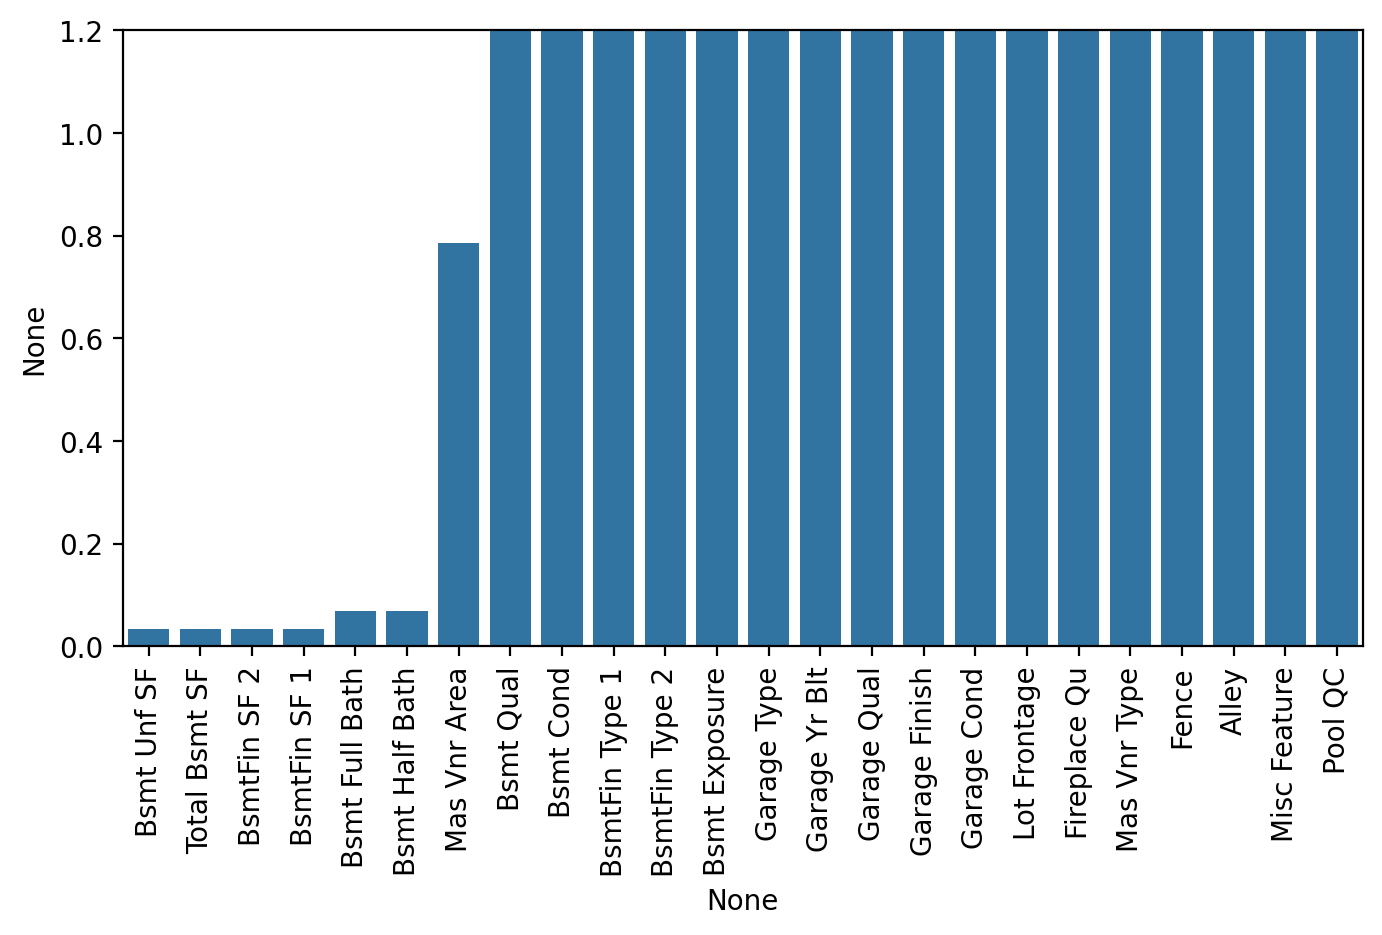

In [31]:
percent_nan = percent_missing(df).sort_values()
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1.2)
plt.show()

In [32]:
# Let's see what is all about Basement features open dataset Summary text file
# Encoding Issue - If the file has a non-standard encoding, Python may throw an error when trying to read it.
# Solution: Specify the encoding - If the file contains characters that might be in a different encoding (e.g., UTF-8 or ISO-8859-1),
# specify the encoding when opening the file:
# with open("D:\\Data Science 2024\\Study\\AmesHousingDatasetSummary.txt",'r',encoding='utf-8') as f:
#     print(f.read())

## We are handling missing data in this case of Basement
1. Let's say we will fill 0 for numeric value column and
2. for String value column ie. categorical will fill 'None'

In [34]:
# Separate the numeric columns
bsmt_num_cols = ['BsmtFin SF 1','BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Half Bath','Bsmt Full Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)    # fill 0 for numric values

# Separe the categorical Columns
bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None') # fill 'None' for categorcal value
   

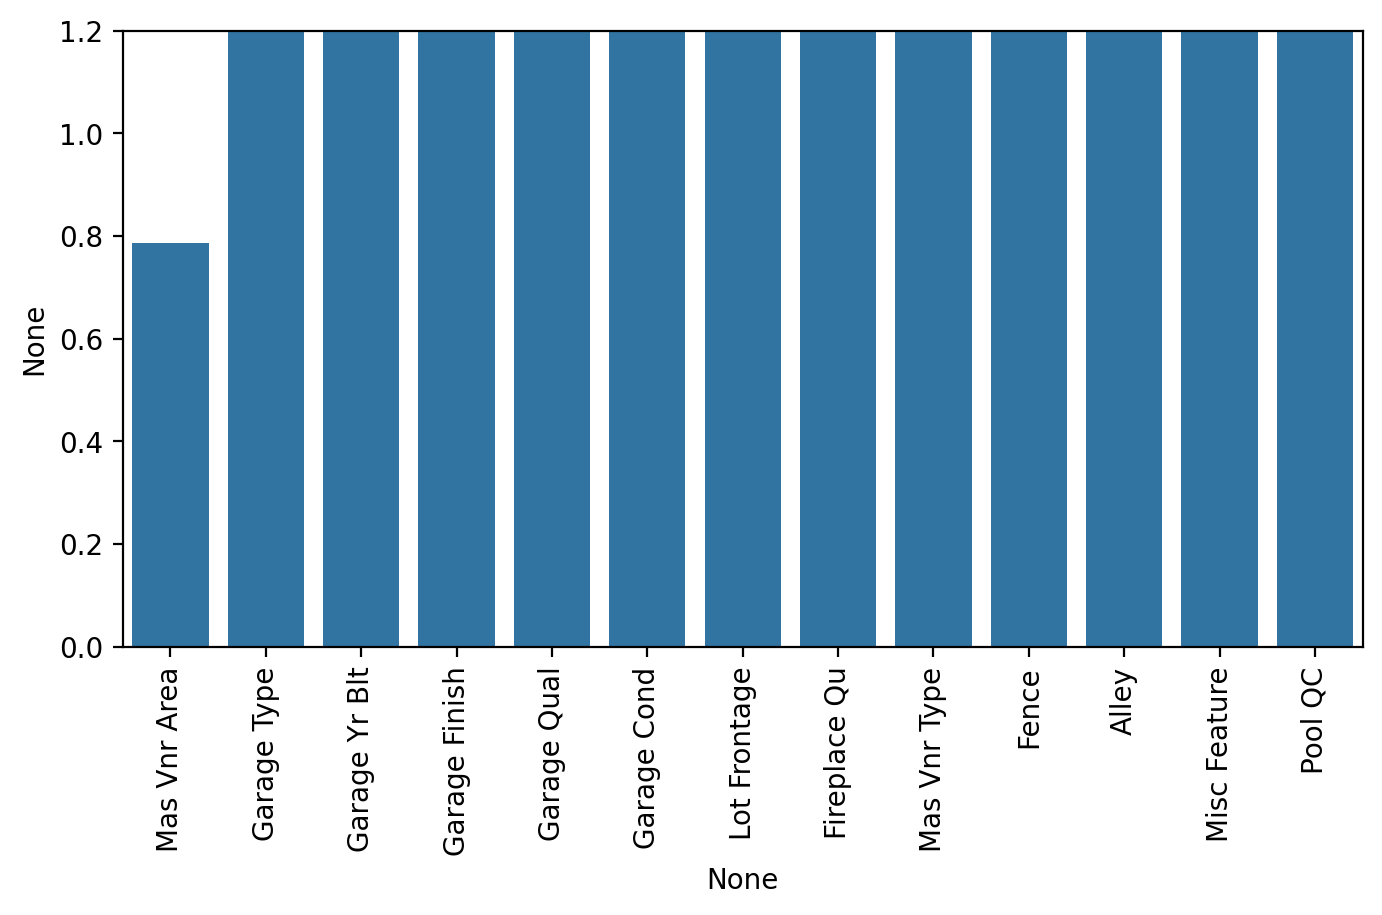

In [35]:
percent_nan = percent_missing(df).sort_values()
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1.2)
plt.show()

In [36]:
sumIsNull = df.isnull().sum()
sumIsNull[sumIsNull > 0].sort_values()

Mas Vnr Area       23
Garage Type       157
Garage Yr Blt     158
Garage Finish     158
Garage Qual       158
Garage Cond       158
Lot Frontage      490
Fireplace Qu     1420
Mas Vnr Type     1773
Fence            2354
Alley            2727
Misc Feature     2820
Pool QC          2913
dtype: int64

In [37]:
# For Mas vnr Area and Mas Vnr Type
# we will fill 'None' for type and 0 for Area for missing values
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

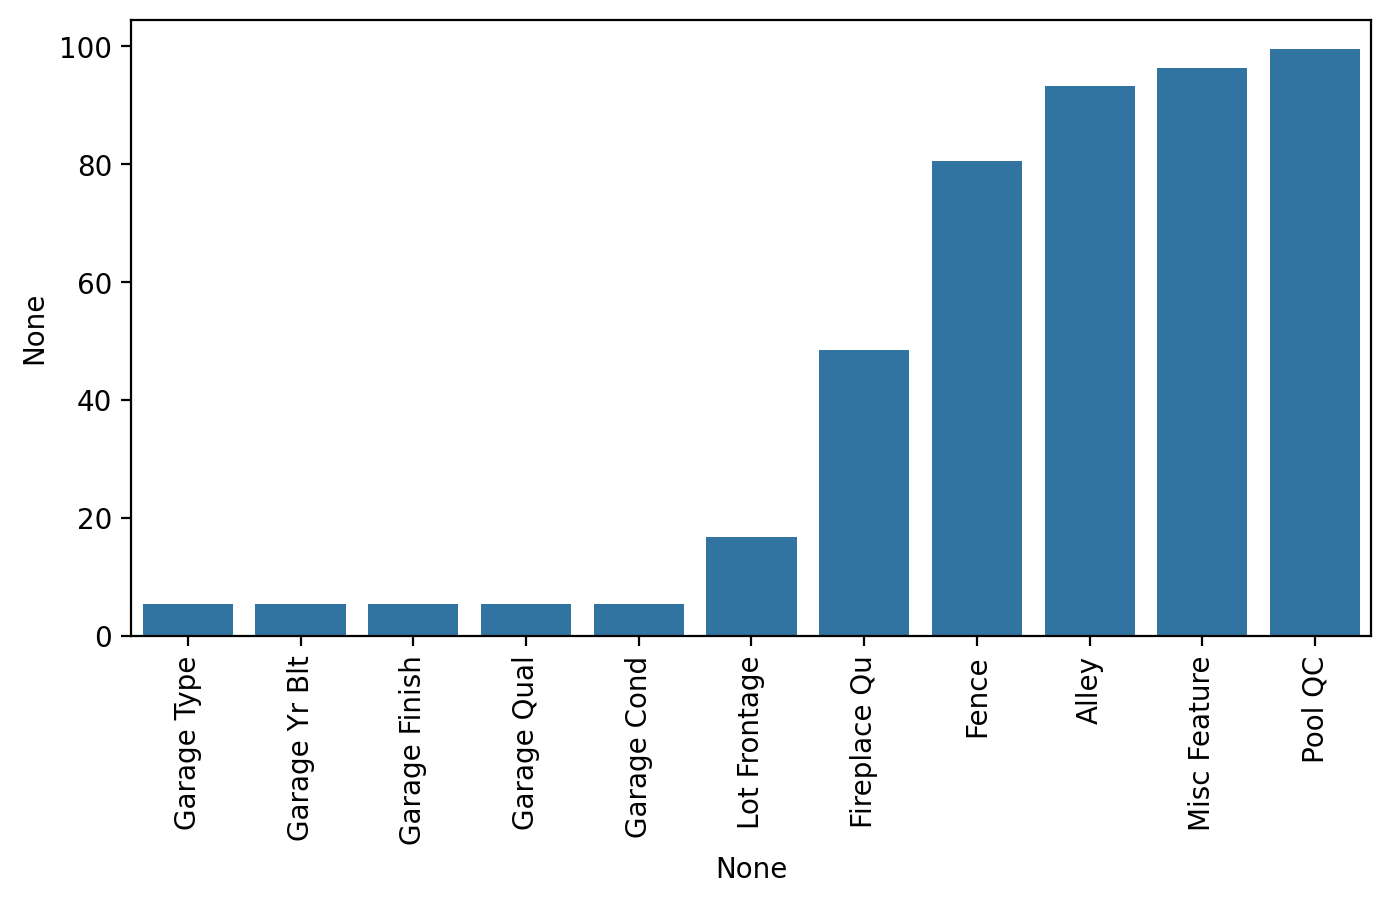

In [38]:
plt_bargraph()

### We are finished with the data missing of upto 1 %, ie. we handled missing data on rows (Row Level)
1. We drop the single rows of missing data
2. We fill the 0 and 'None' for Numeric and Categorical data values.

### For large data missing, we will have to do feature consideration (Column Level)
1. Either we will drop the feature(column) itself if the most of the data is missing for that
2. Or we will fill values using mode or median strategy

# Part II - Feature Columns

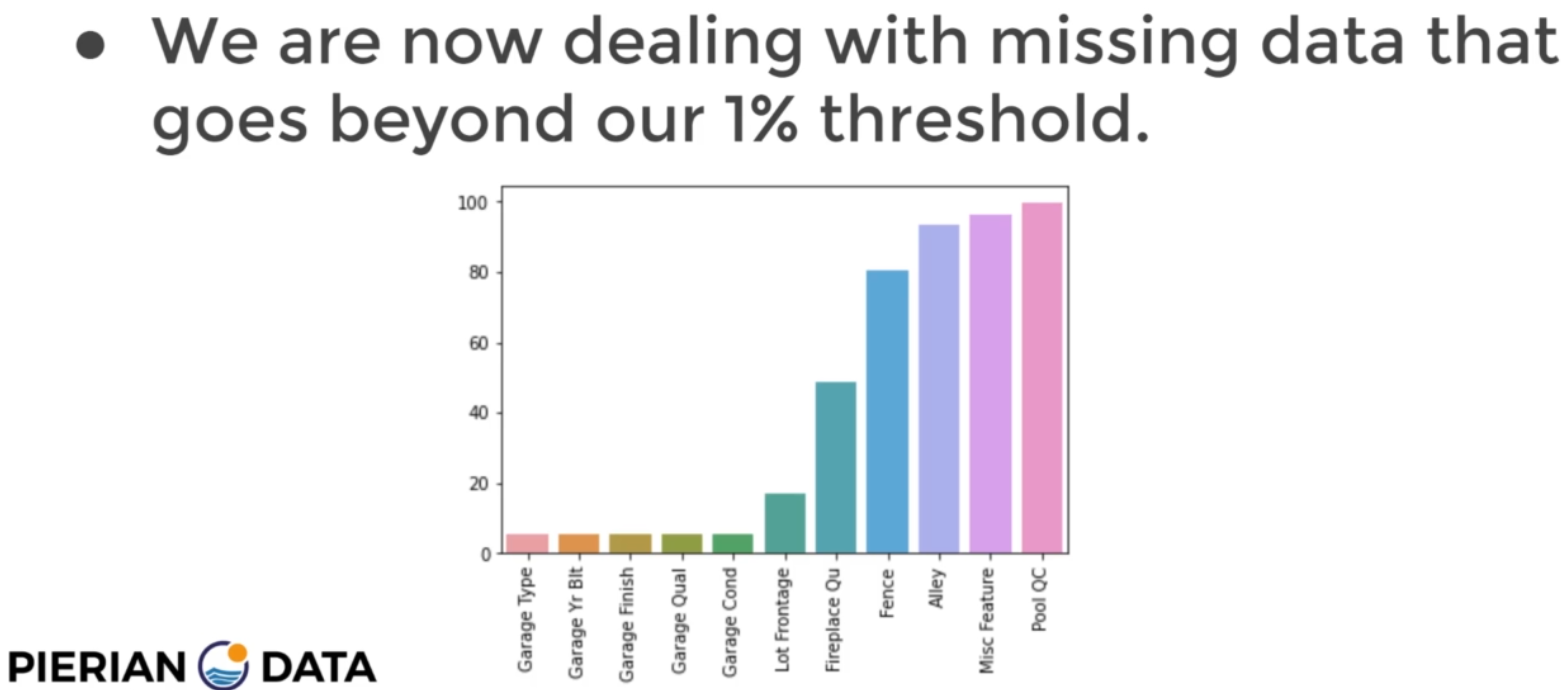
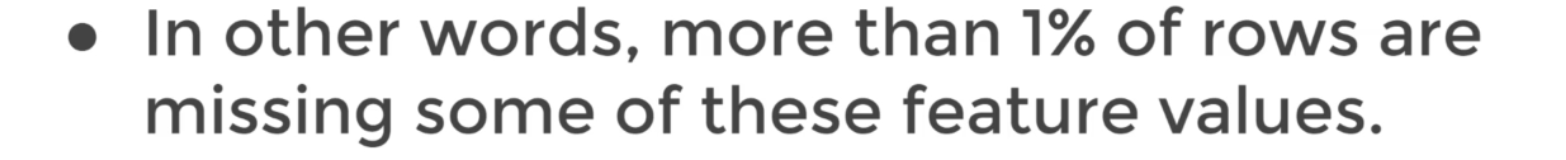<br>
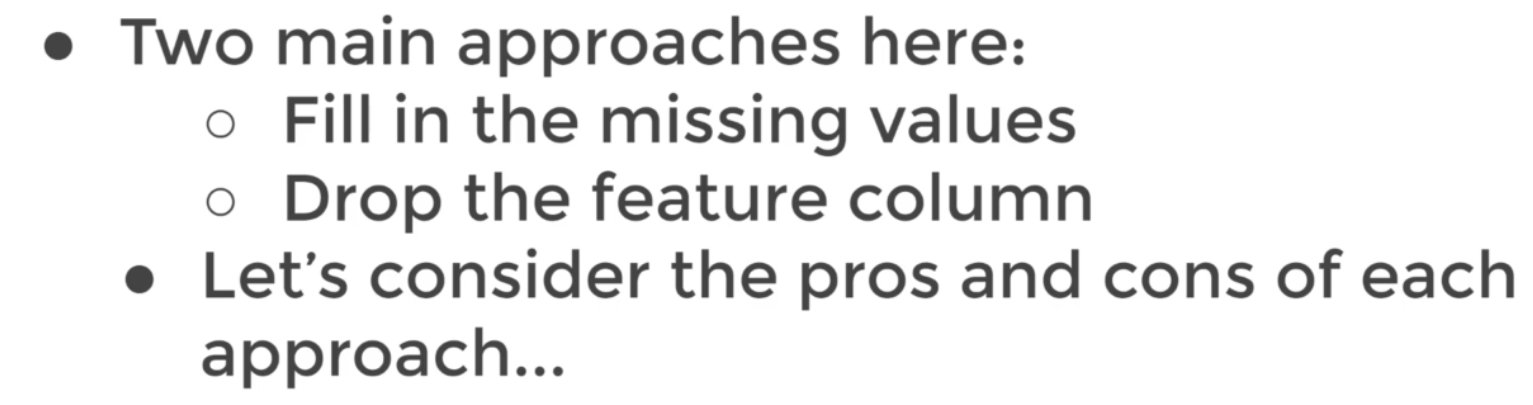<br>
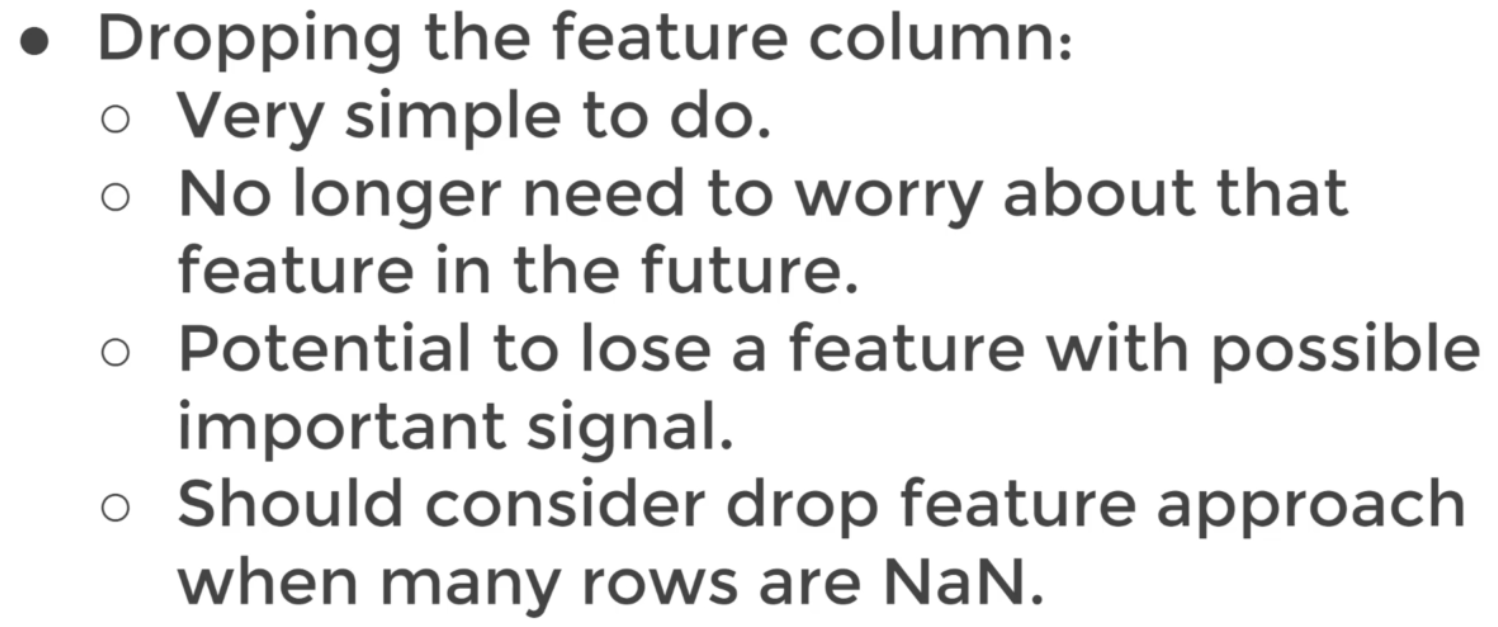<br>
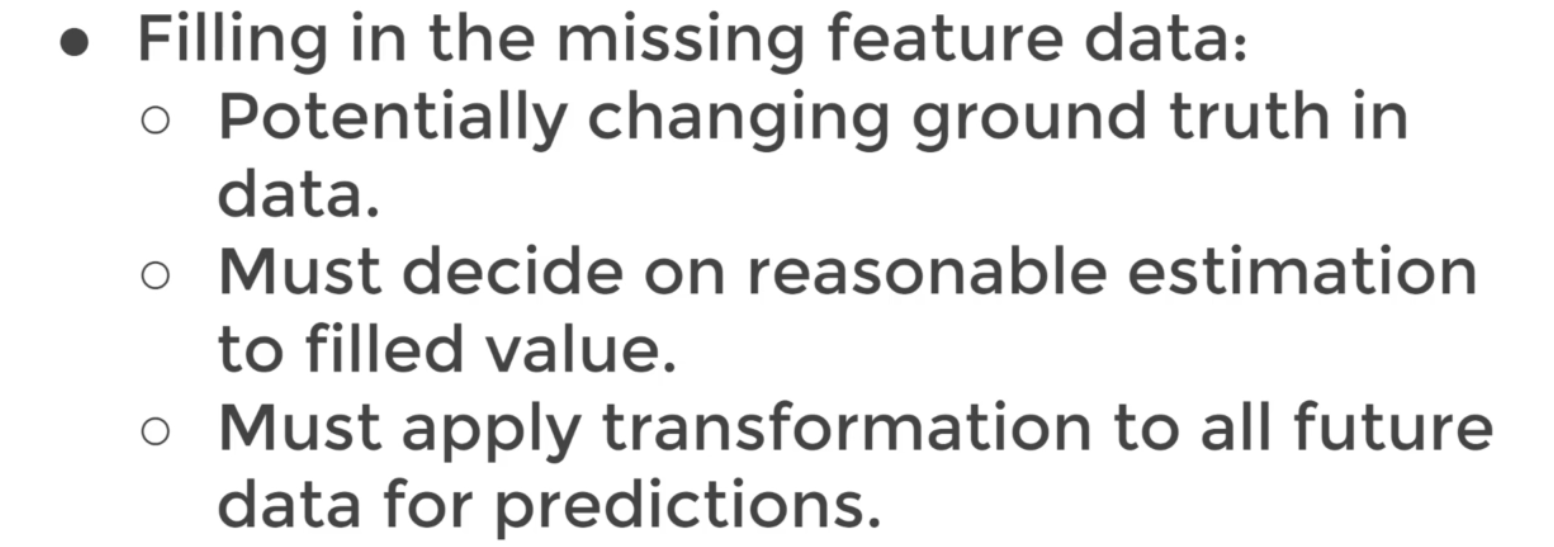<br>
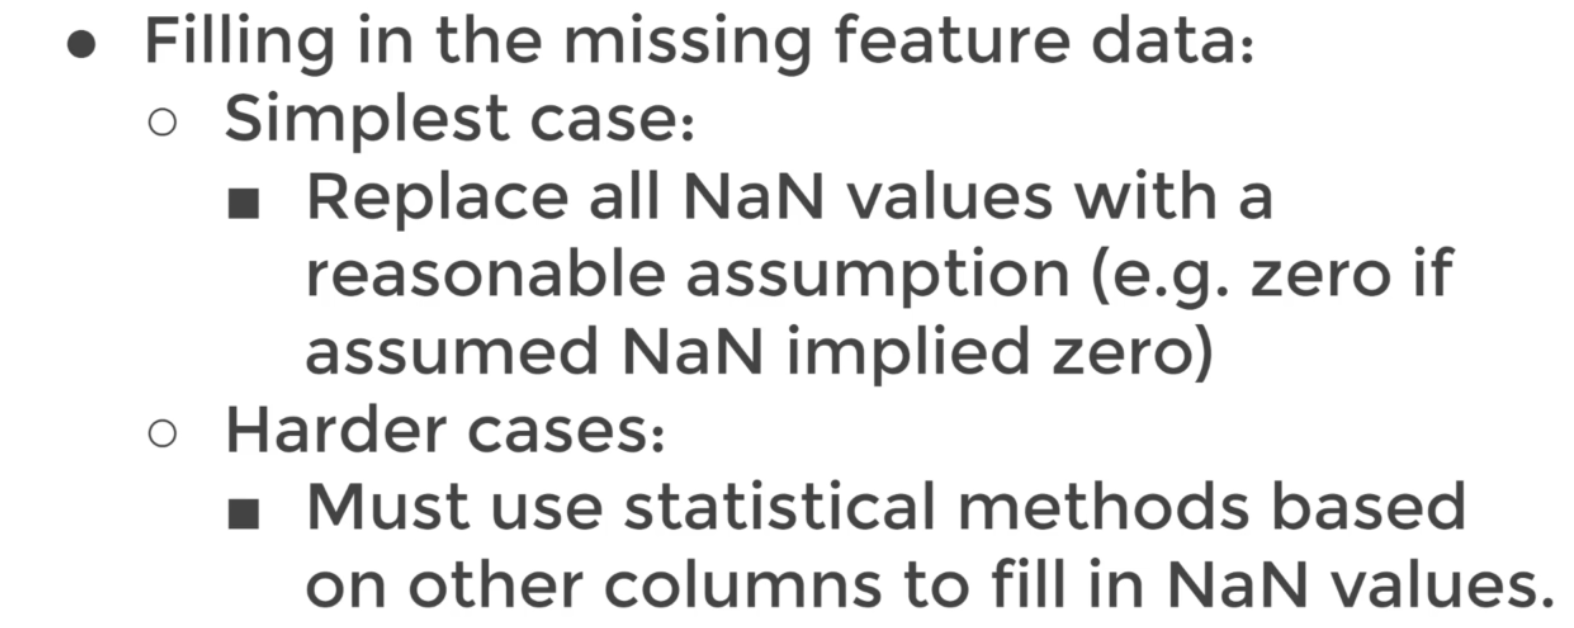<br>
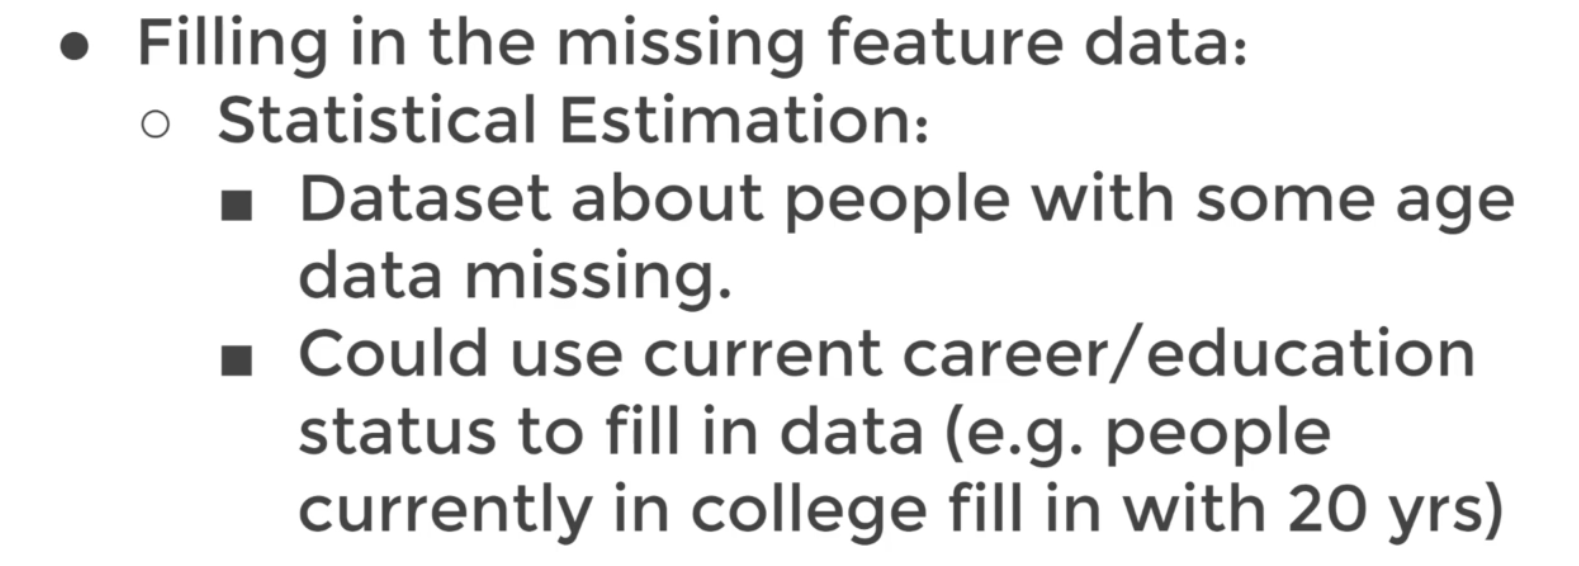<br>
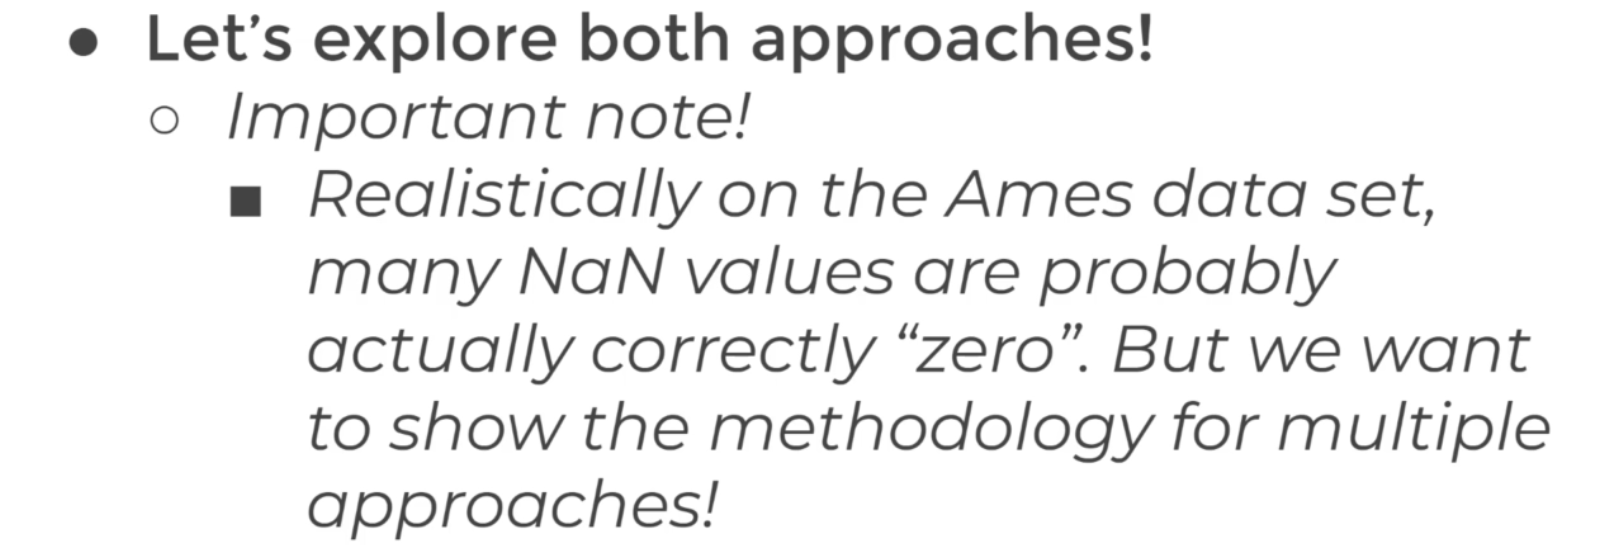

## let's start with the Garage Feature i.e 5 features. Read the details in DataSummary.txt
1. We will get to know that the values are missing for the reason that - No Garage is there
2. Few Features are categorical and remaining are numerical
3. Let's separate them and fill the values for those.
4. As the values are missing because there is no garage we will set categorical missing values as 'None'
5. and Numerical missing values are 0

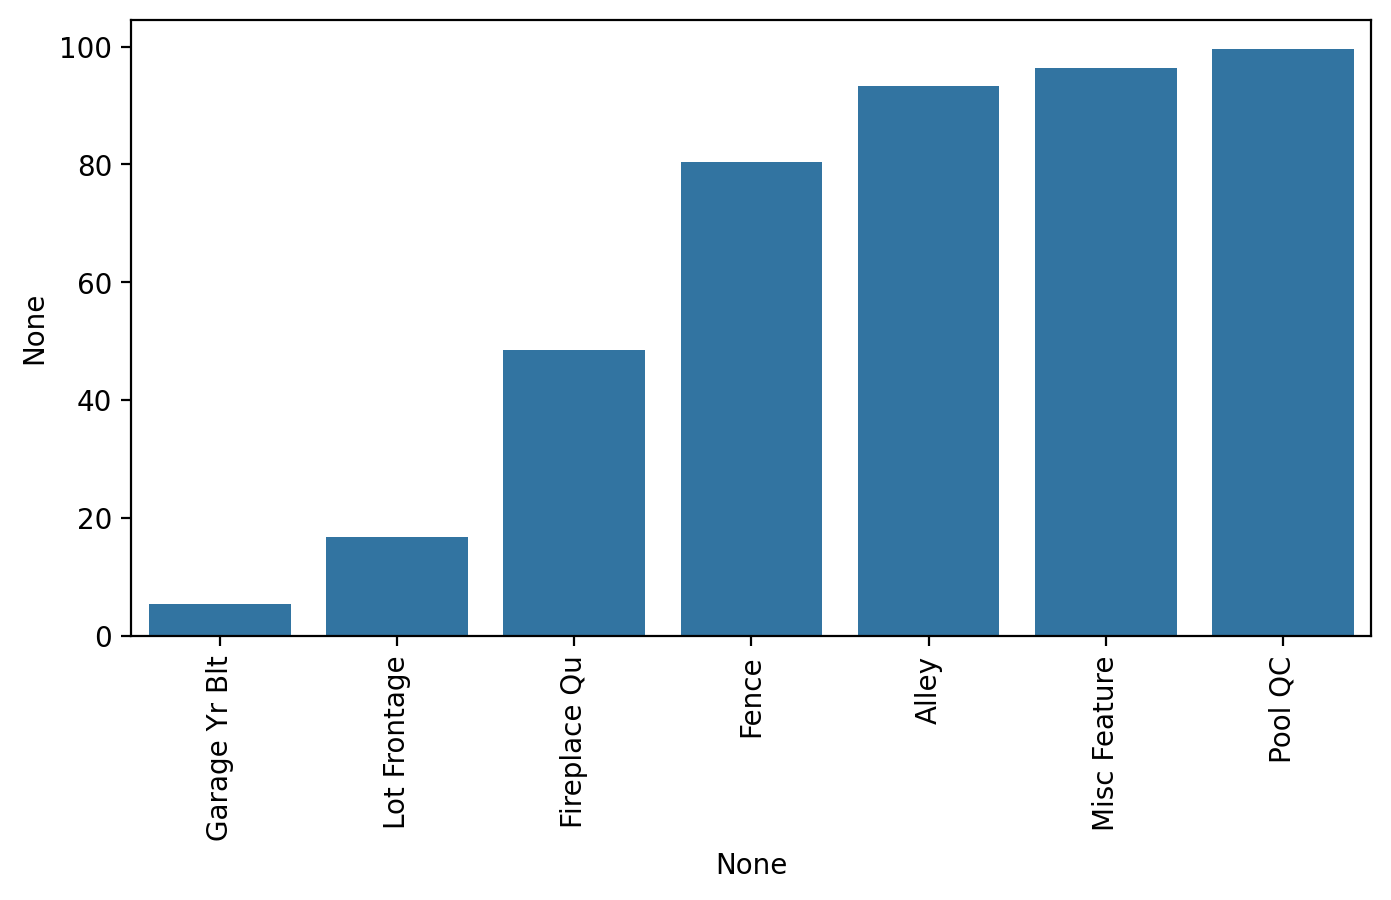

In [43]:
gar_str_cols = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

# Graph the plot after filling values
plt_bargraph()

In [44]:
# to fill the values 'Garage Yr blt', as there is no garage we will set it to 0.
# It is not the perfect solution but it better to assume built year as 0 where Garage is not applicable or 'None'
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

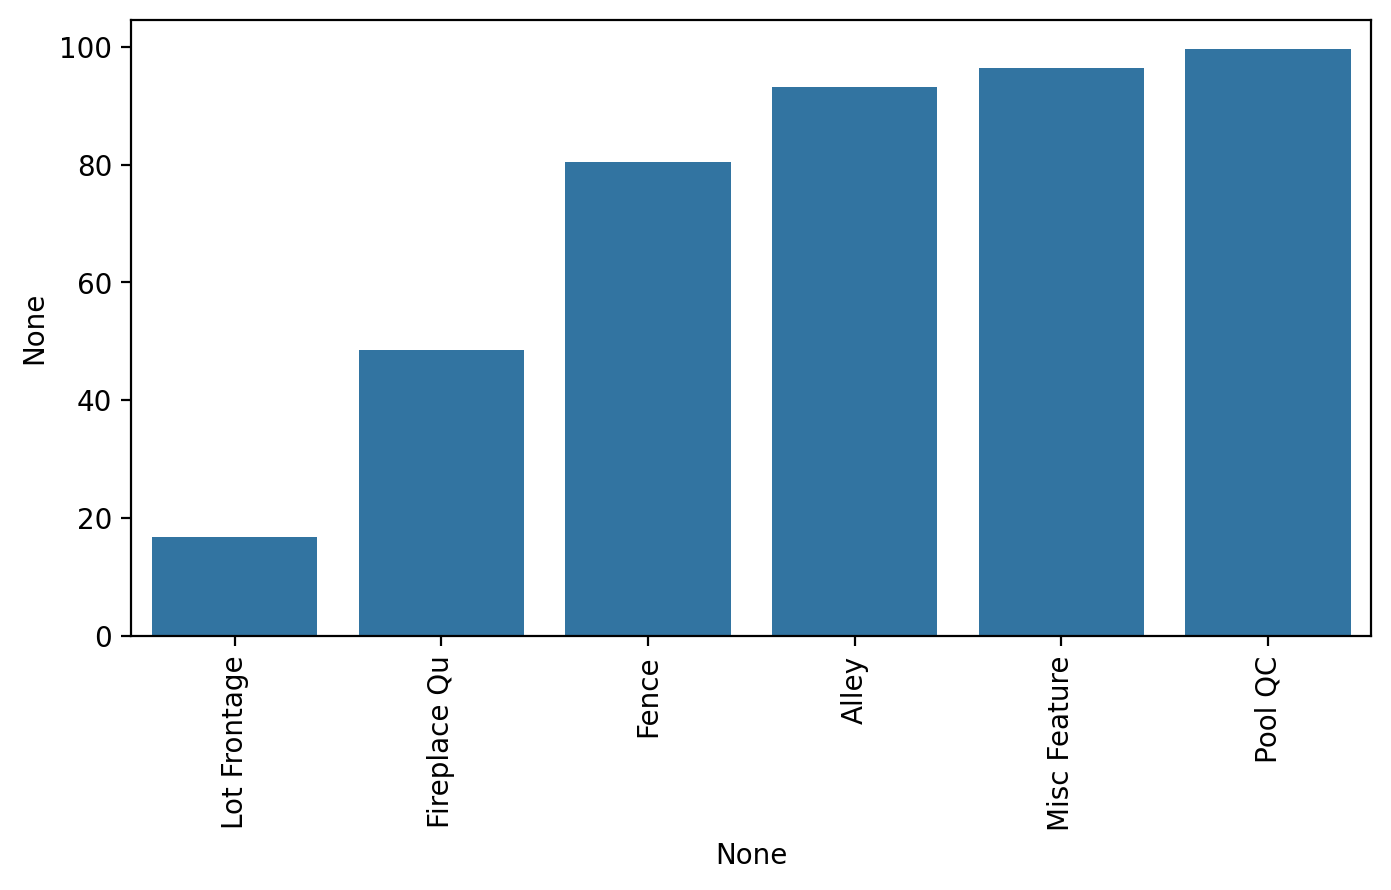

In [45]:
plt_bargraph()

In [46]:
# Calculate the percentage of data missing per feature column
percent_nan = percent_missing(df).sort_values()
percent_nan

Lot Frontage    16.752137
Fireplace Qu    48.547009
Fence           80.478632
Alley           93.230769
Misc Feature    96.410256
Pool QC         99.589744
dtype: float64

## As 'Alley', 'Misc Feature','Pool QC' Features are having missing data for greater than 90% of the data
### We will simply drop these columns

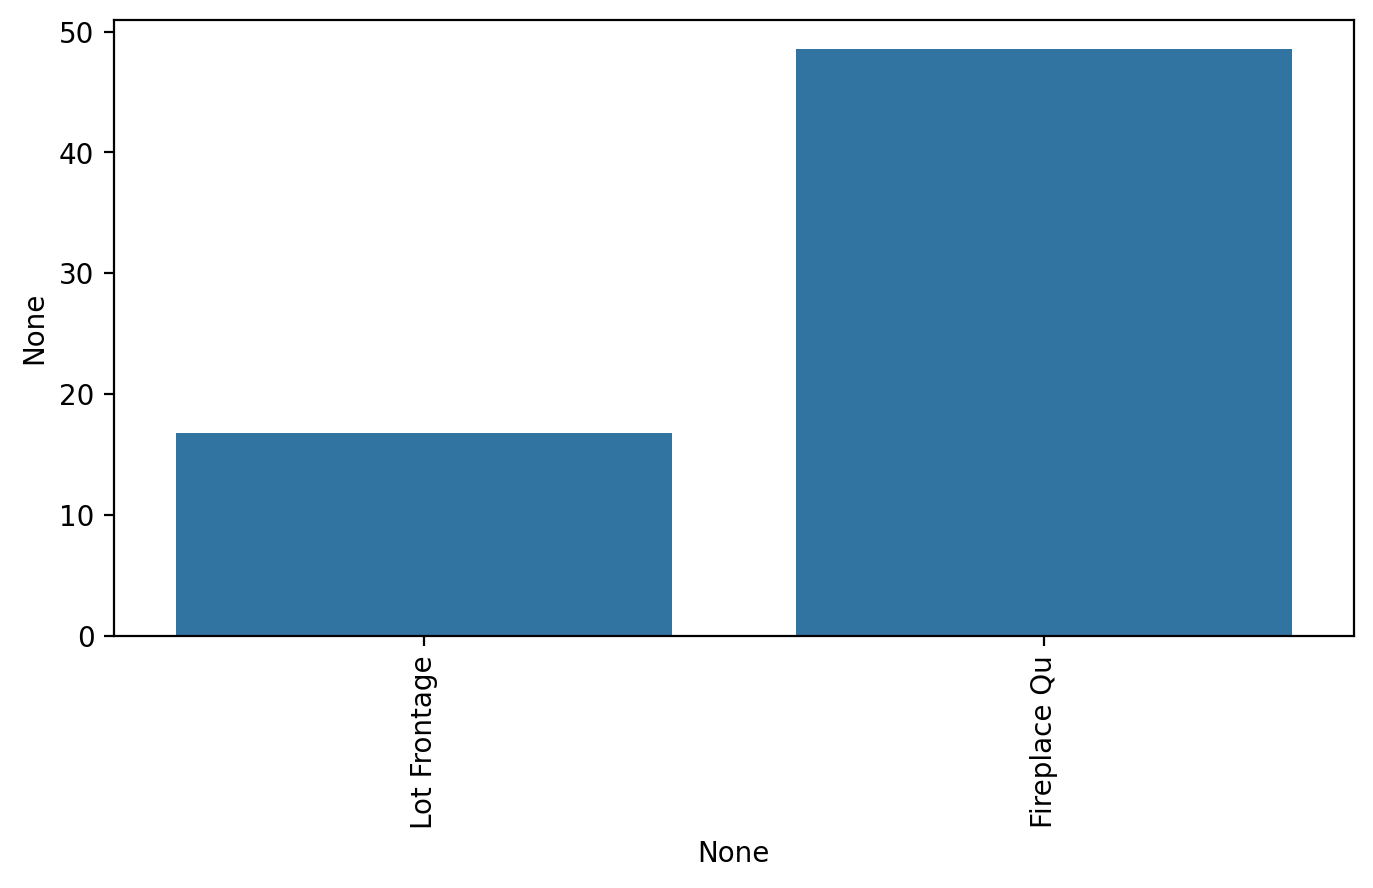

In [48]:
df = df.drop(['Alley','Misc Feature','Pool QC','Fence'],axis=1)
plt_bargraph()

## The real thinking comes where the missing data is not high enough to drop the column and not too little missing data to drop the couple of rows

In [50]:
df['Fireplace Qu'].value_counts()

Fireplace Qu
Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: count, dtype: int64

#### As it is categorical feature, we will add one more category as 'None' where is the missing values

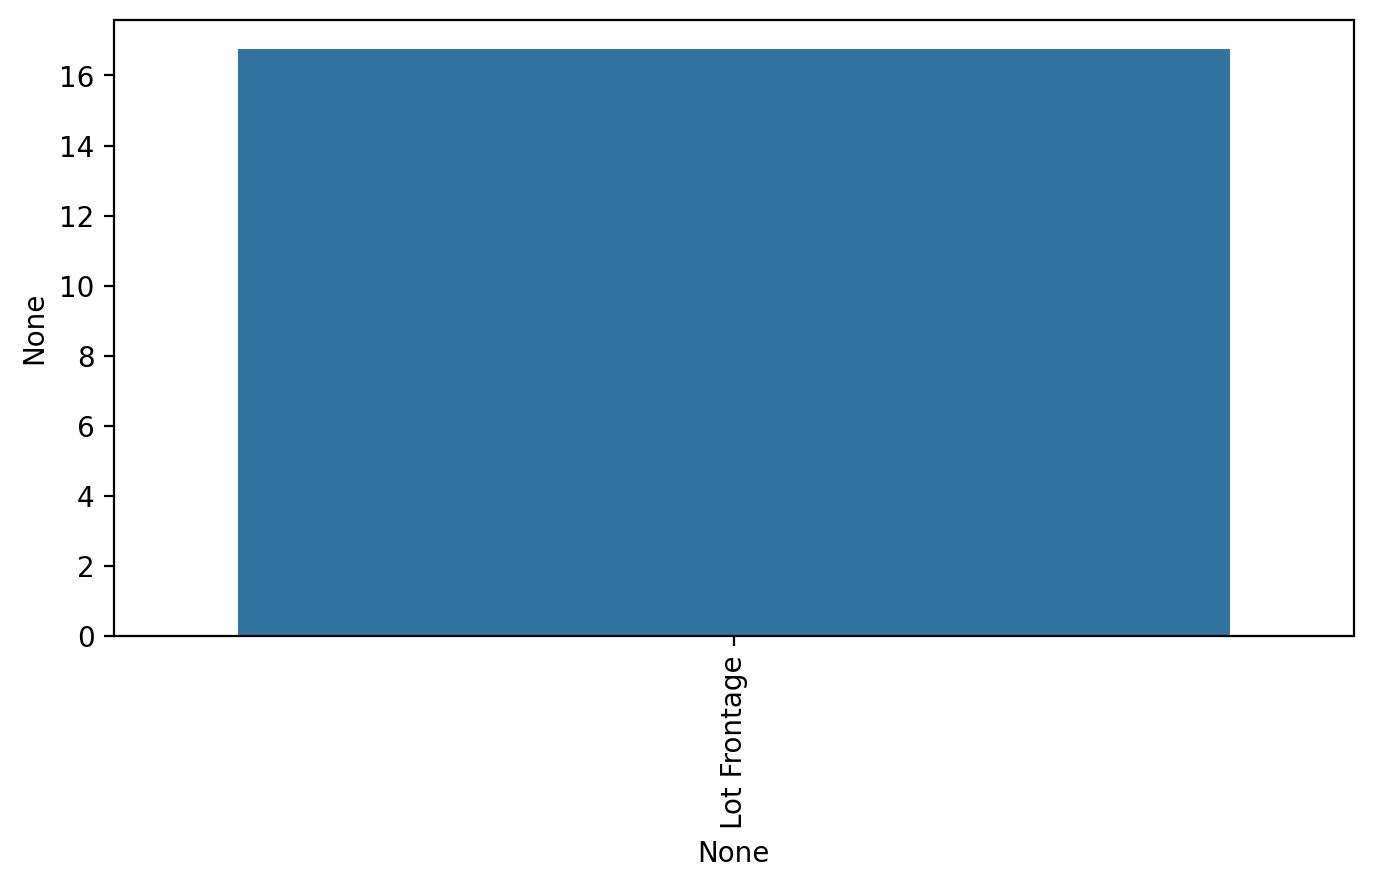

In [52]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')
plt_bargraph()

### Lot Frontage : Linear feet of street connected to property
### Neighborhood : Physical Locations within Ames City Limits

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

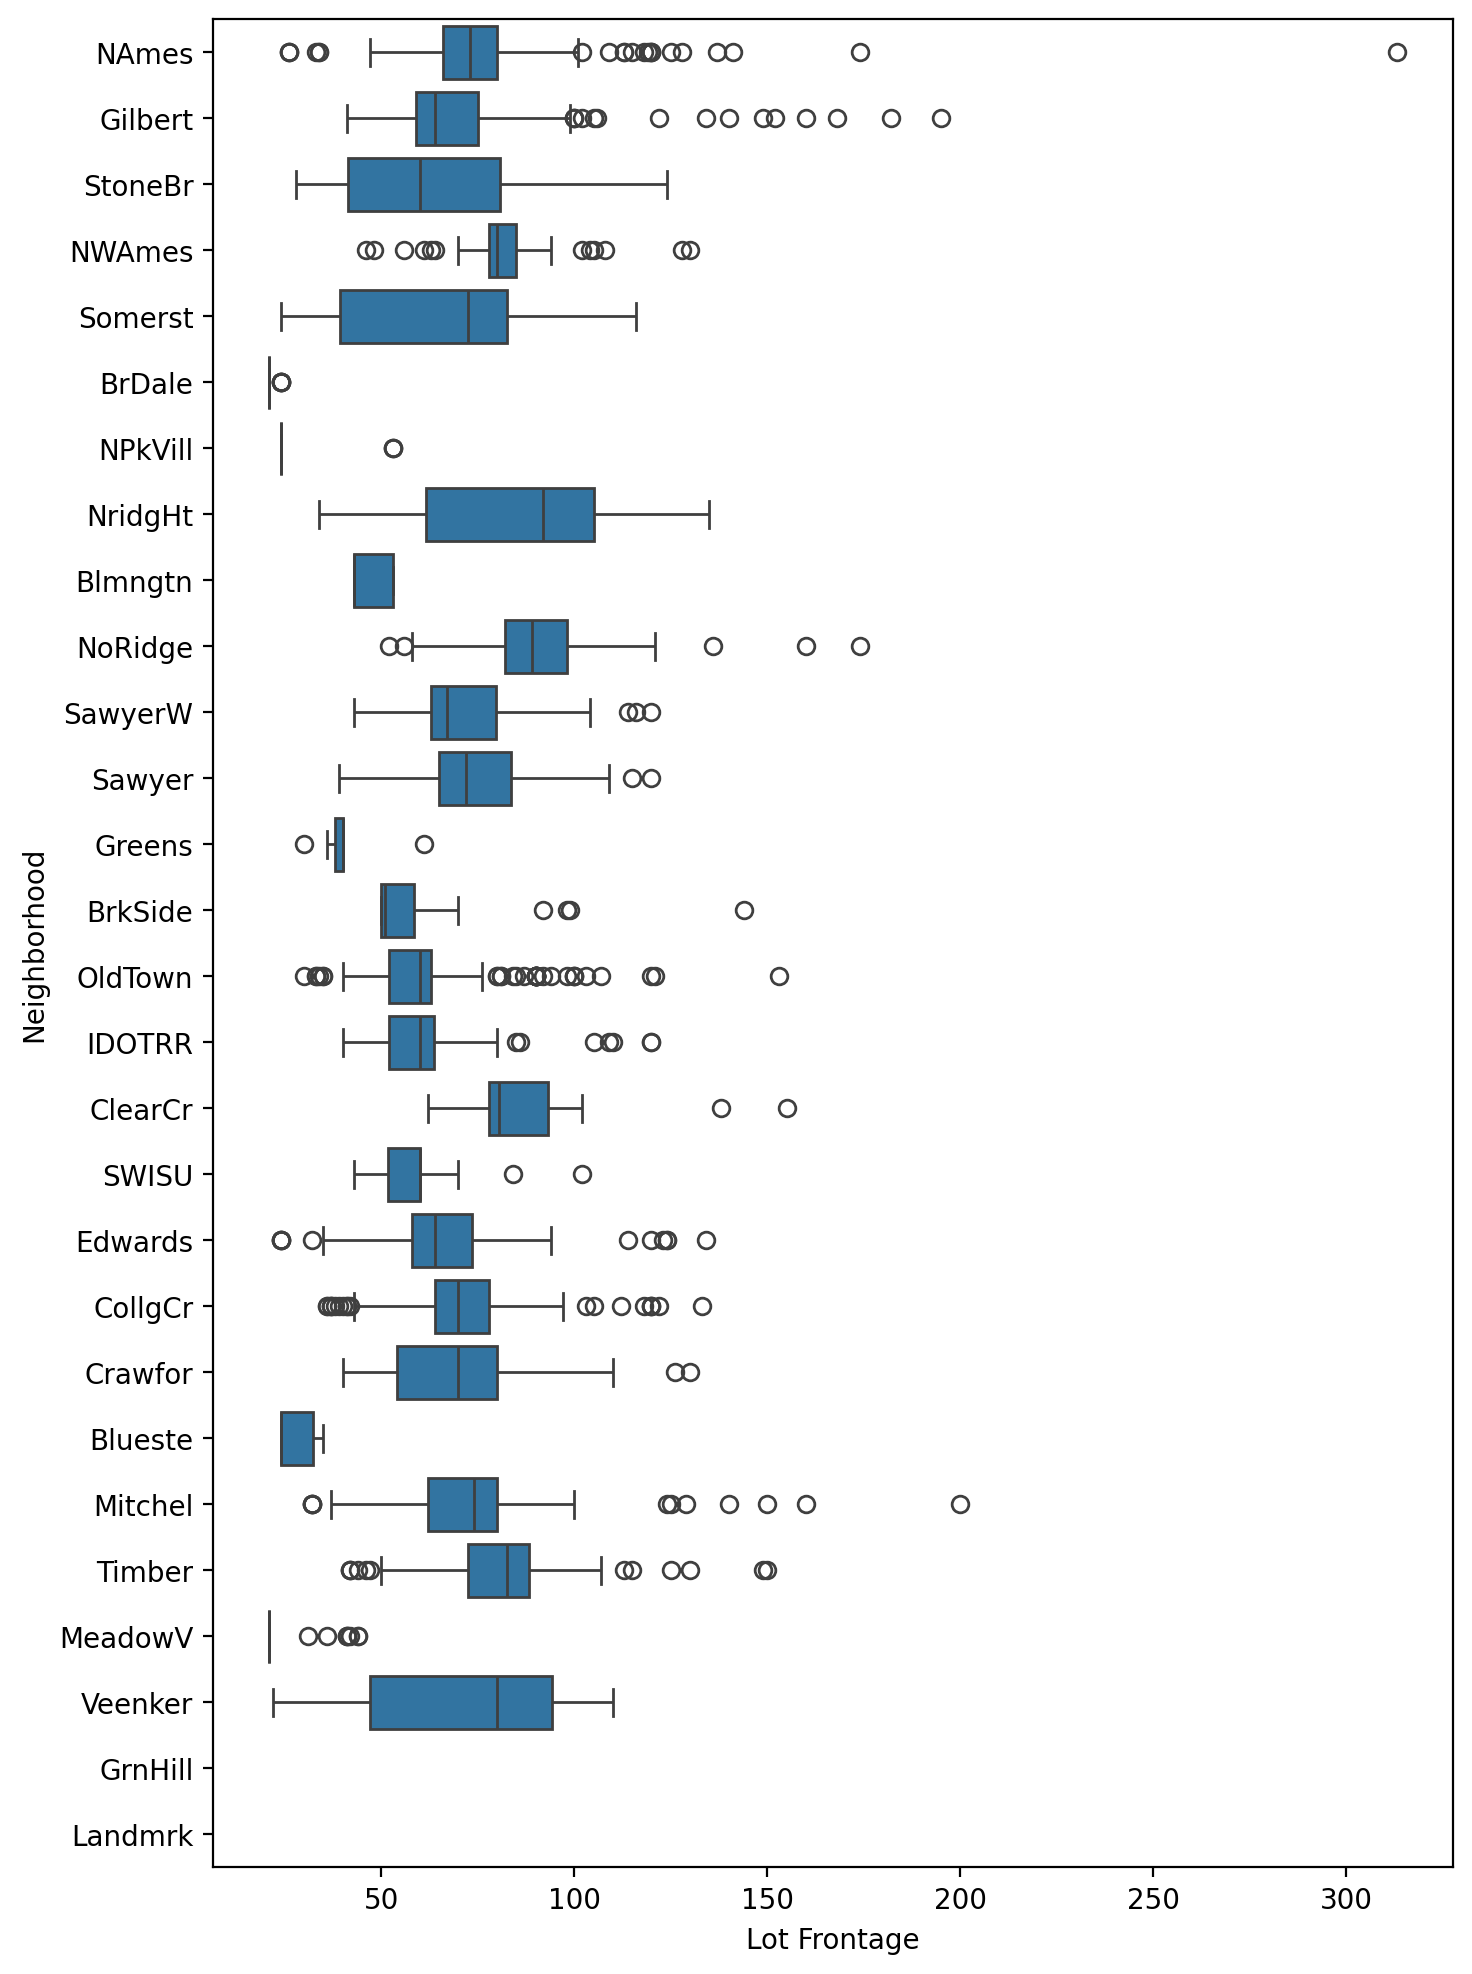

In [54]:
plt.figure(figsize=(8,12),dpi=200)
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

### We will map the Neighborhood for the missing Lot Frontage Value
#### then we fill the missing value as the average of Lot Frontage of the corresponding Neighborhood

In [56]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [57]:
df['Lot Frontage']= df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value : value.fillna(value.mean()))

In [58]:
df.groupby('Neighborhood')['Lot Frontage']

In [59]:
df.isnull().sum().sort_values()

MS SubClass      0
Fireplaces       0
Functional       0
TotRms AbvGrd    0
Kitchen Qual     0
                ..
Exterior 2nd     0
Exterior 1st     0
Bsmt Qual        0
SalePrice        0
Lot Frontage     3
Length: 76, dtype: int64

### There is no 'Lot Frontage' for 3 of the Neighborhood
* We can simply fill the values as 0
  

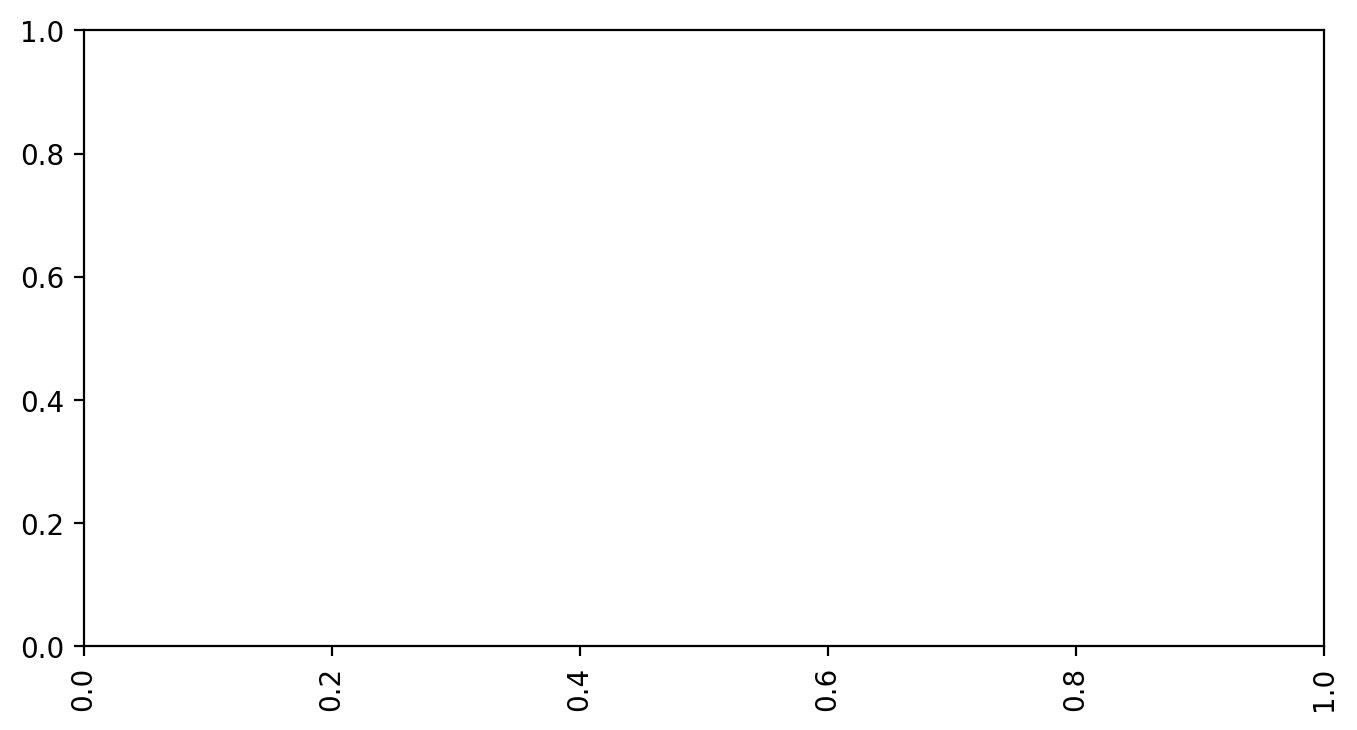

In [61]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)
plt_bargraph()

# End of the Session